## Training des CNN

Verwendung in der Projektphase 2

Das Notebook zeigt beispielhaft die Durchführung folgender Schritte mit Keras:
- Vorverarbeitungsschritte der Bilder
- Trainieren eines CNNs
- Speichern und Laden
- Anwendung
- Transformation in ein TF-lite-Modell

Die verwendeten Bilder befinden sich in `./data/images`.

In [1]:
import matplotlib.pylab as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import os
import cv2

In [2]:
# Lesen der Filenamen der Bilder in einem Ordner   
# C:\Users\EISENBRO\Desktop\python\code\roman\phase2\bilder_nn 
# img_path = 'bilder_nn/'
img_path = "C:/Users/EISENBRO/Desktop/python/code/roman/phase2/bilder_nn/"
img_files = os.listdir(img_path)
#print(img_files)
len(img_files) , len(set(img_files))

(1142, 1142)

In [11]:
"""
# nicht druckbares Zeichen raus: 
import os
del_zeichen = ':'
for d in os.listdir(img_path):
    if del_zeichen in d:
        neuer_datname = d.replace(del_zeichen, '')
        print(f'Alter Name: {d}')
        print(f'Neuer Name: {neuer_datname}')
        os.rename(os.path.join(img_path, d), os.path.join(img_path, neuer_datname))
"""


"\n# nicht druckbares Zeichen raus: \uf022\nimport os\ndel_zeichen = ':'\nfor d in os.listdir(img_path):\n    if del_zeichen in d:\n        neuer_datname = d.replace(del_zeichen, '')\n        print(f'Alter Name: {d}')\n        print(f'Neuer Name: {neuer_datname}')\n        os.rename(os.path.join(img_path, d), os.path.join(img_path, neuer_datname))\n"

In [12]:

"""# Dateinamen vereinfachen:
laufende_nummer = 0
for dateiname in os.listdir(img_path):
    if os.path.isfile(os.path.join(img_path, dateiname)):
        dateiendung = os.path.splitext(dateiname)[1]

        laufende_nummer += 1
        nummer = f"{laufende_nummer:05d}"
        neuer_dateiname = nummer + '_' + dateiname[23:]
        pos_unterstrich = neuer_dateiname.rfind('_')

        rest_stellen = len(neuer_dateiname) - pos_unterstrich

        if rest_stellen == 7: # zweistelliger Winkel
            #neuer_dateiname = (neuer_dateiname[:pos_unterstrich] + '0' + neuer_dateiname[pos_unterstrich:])
            #neuer_dateiname = (neuer_dateiname[:pos_unterstrich] + neuer_dateiname[pos_unterstrich:])
            neuer_dateiname = neuer_dateiname[:pos_unterstrich] + '_0' + neuer_dateiname[pos_unterstrich + 1:]
            #print('0'+ neuer_dateiname[pos_unterstrich+1:])
        print(neuer_dateiname)
        os.rename(os.path.join(img_path, dateiname), os.path.join(img_path, neuer_dateiname))
print('Alle Dateien umbenannt')"""



        

'# Dateinamen vereinfachen:\nlaufende_nummer = 0\nfor dateiname in os.listdir(img_path):\n    if os.path.isfile(os.path.join(img_path, dateiname)):\n        dateiendung = os.path.splitext(dateiname)[1]\n\n        laufende_nummer += 1\n        nummer = f"{laufende_nummer:05d}"\n        neuer_dateiname = nummer + \'_\' + dateiname[23:]\n        pos_unterstrich = neuer_dateiname.rfind(\'_\')\n\n        rest_stellen = len(neuer_dateiname) - pos_unterstrich\n\n        if rest_stellen == 7: # zweistelliger Winkel\n            #neuer_dateiname = (neuer_dateiname[:pos_unterstrich] + \'0\' + neuer_dateiname[pos_unterstrich:])\n            #neuer_dateiname = (neuer_dateiname[:pos_unterstrich] + neuer_dateiname[pos_unterstrich:])\n            neuer_dateiname = neuer_dateiname[:pos_unterstrich] + \'_0\' + neuer_dateiname[pos_unterstrich + 1:]\n            #print(\'0\'+ neuer_dateiname[pos_unterstrich+1:])\n        print(neuer_dateiname)\n        os.rename(os.path.join(img_path, dateiname), os.path

In [13]:
# # umbenannte Bilder nochmal neu einlesen:
# img_files = os.listdir(img_path)
# len(img_files)

1142

00001_Angle_066.png
C:/Users/EISENBRO/Desktop/python/code/roman/phase2/bilder_nn/
C:/Users/EISENBRO/Desktop/python/code/roman/phase2/bilder_nn/00001_Angle_066.png
(480, 640, 3)


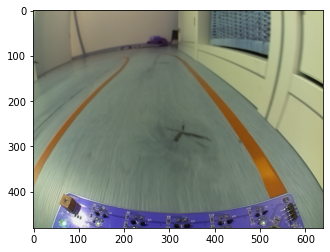

In [3]:
# Ansicht eines Beispielbildes (rot grün vertauscht)
print(img_files[0])
print(img_path)
print(img_path + img_files[0])
img_example = cv2.imread(img_path + img_files[0])

plt.imshow(img_example)
print(img_example.shape)

In [4]:
# Testweises Einlesen aller Bilder -> Kontrolle der Anzahl
imgs_test = np.array([cv2.imread(img_path+i) for i in img_files])
imgs_test.shape

(1142, 480, 640, 3)

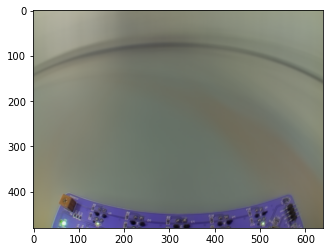

In [5]:
# Mittleres Bilder der Trainingsbilder
img_mean = imgs_test.mean(axis=0).astype('int')
plt.imshow(img_mean)

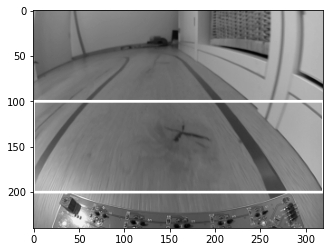

In [84]:
# Testweise Bildbearbeitung
sp=(0,200)
ep=(320,100)
dim = (320,240)
interpolation = cv2.INTER_AREA
img_example_x = img_example.copy()
img_example_x = cv2.cvtColor(img_example_x,cv2.COLOR_BGR2GRAY)
img_example_x= cv2.resize(img_example_x,dim,interpolation)
#plt.imshow(img_example_x)
plt.imshow(cv2.rectangle(img_example_x,sp,ep,(255,255,0),2),cmap='gray')

(135, 320, 3)


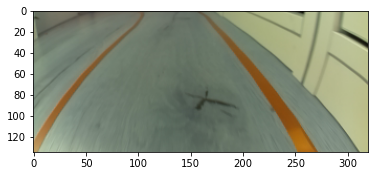

In [6]:
def resize_image( img, x1, x2, y1, y2): # kommt vom Auto
    # 100,370,0,640
    img_cut = img[x1:x2,y1:y2].copy()                # Foto beschneiden [200:400,20:620]
    #dim = img_cut.shape
    #dim = (320,240) # Bildgröße muss dem des Autos entsprechen!
    interpolation = cv2.INTER_AREA
    img_cut = cv2.resize(img_cut, (320, 135), interpolation)
    return img_cut

img_test = resize_image(img_example, 100,370,0,640 )
print(img_test.shape)
plt.imshow(img_test)


In [17]:
# Definition einer Funktion zur Vorverarbeitung der Trainingsbilder
def transform_image(img):
    dim = (320,240) # Bildgröße muss dem des Autos entsprechen!
    interpolation = cv2.INTER_AREA
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) # Verwendung von Graustufenbildern
    img = cv2.resize(img,dim,interpolation) #  Anpassung der Bildgröße
    img = img[50:200,:] # Ausschneiden eines Teilbildes -> wie beim Auto
    return img

In [ ]:
# Alternative für verkleinert Bilder
# Definition einer Funktion zur Vorverarbeitung der Trainingsbilder
def transform_image_small(img):
    dim = (64,48)
    interpolation = cv2.INTER_AREA
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) # Verwendung von Graustufenbildern
    img = cv2.resize(img,dim,interpolation) #  Anpassung der Bildgröße
    #img = img[100:200,:] # Ausschneiden eines Teilbildes
    img = img[20:40,:] # Ausschneiden eines Teilbildes
    return img

In [7]:
# Laden und Vorverarbeiten aller Trainingsbilder
#imgs = np.array([transform_image(cv2.imread(img_path+i)) for i in img_files])
imgs = np.array([resize_image(cv2.imread(img_path+i),100,370,0,640) for i in img_files])
imgs.shape

(1142, 135, 320, 3)

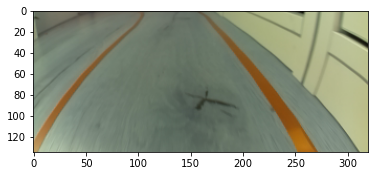

In [8]:
# Ansicht eines vorverarbeiteten Beispielbilder
plt.imshow(imgs[0])

117.36124114884002
255
0


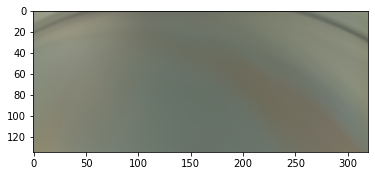

In [9]:
# Mittleres vorverarbeitetes Trainingsbild
plt.imshow(imgs.mean(axis=0).astype('int'))
print(imgs.mean())
print(imgs.max())
print(imgs.min())

### Spiegeln der Bilder (Augmentation)

In [27]:
# Test Spiegeln eines Bildes
img_example_x_mirrored = img_example_x[:,::-1] # alternativ mit cv2.flip
plt.figure()
plt.subplot(121)
plt.imshow(img_example_x,cmap='gray')
plt.subplot(122)
plt.imshow(img_example_x_mirrored,cmap='gray')

NameError: name 'img_example_x' is not defined

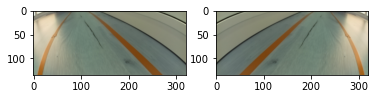

In [10]:
# Test Spiegeln eines vorverarbeiteten Bildes
imgs_mirrored = imgs[:,:,::-1]
plt.figure()
plt.subplot(121)
plt.imshow(imgs[10])
plt.subplot(122)
plt.imshow(imgs_mirrored[10])

In [11]:
# Zusammenfügen der ungespiegelten und der gespiegelten Trainingsdaten
print(imgs.shape)
print(imgs_mirrored.shape)
imgs_all = np.concatenate((imgs,imgs_mirrored))
print(imgs_all.shape)

(1142, 135, 320, 3)
(1142, 135, 320, 3)
(2284, 135, 320, 3)


### "Spiegeln" der Lenkwinkel (Agumentation)
- inklusive des Ladens/Extrahierens der Lenkwinkel aus den Dateinamen

In [12]:
# Position des Lenkwinkels im Filenamen (abhängig vom OS!)
print(img_files[0])
#print('-',i[46:-4],'-') # Raspberry/Linux
print('-',img_files[0][12:-4],'-') # Windows





00001_Angle_066.png
- 066 -


In [19]:
angles = np.array([int(i[12:-4]) for i in img_files]) # Extrahieren der Lenkwinkel aus dem Dateinamen
angles

array([66, 89, 92, ..., 82, 19, 19])

In [20]:
# Winkel < 45 und > 135 Grad anpassen
angles = np.clip(angles, 45, None)
angles = np.clip(angles, None, 135)
angles

array([66, 89, 92, ..., 82, 45, 45])

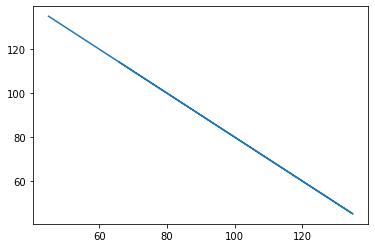

In [21]:
#angles = np.array([int(i[46:-4]) for i in img_files]) # Extrahieren der Lenkwinkel aus dem Dateinamen
#angles = np.array([int(i[12:-4]) for i in img_files]) # Extrahieren der Lenkwinkel aus dem Dateinamen
angles_mirrored = [-(a-90)+90 for a in angles] # Spiegeln der Winkel

# Kontrolle
plt.plot(angles,angles_mirrored)
angles_all = np.hstack((angles,angles_mirrored)) # Zusammenführen der ungespiegelten und gespiegelten Winkel

In [22]:
angles_all

array([ 66,  89,  92, ...,  98, 135, 135])

### Verteilung der Lenkwinkel

<AxesSubplot:>

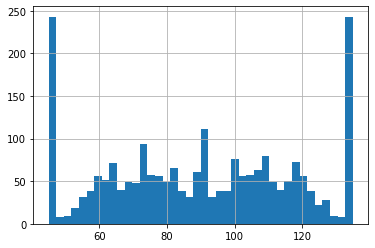

In [23]:
pd.Series(angles_all, name ='angles').hist(bins = 40)

In [24]:
# Kontrolle und Reshapen der Trainingsdaten
print(angles_all.shape)
print(imgs_all.shape)
n,h,w,_=imgs_all.shape
imgs_all = imgs_all.reshape((n,h,w,3)) # Convolutional Input-Layer benötigt diese Format/Shape -> 1 bei Gray
print(imgs_all.shape)

(2284,)
(2284, 135, 320, 3)
(2284, 135, 320, 3)


### Einteilen der Trainingsdaten

In [25]:
# Split Trainings- und Testdaten
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(imgs_all, angles_all, test_size = 0.2, random_state = 1)

### Erstellen des NN  mit Tensorflow

In [26]:
# Korntrolle
print(X_train.dtype)
print(X_train.shape)
print(y_train.shape)
print(X_validate.dtype)
print(X_validate.shape)
print(X_validate.shape)

uint8
(1827, 135, 320, 3)
(1827,)
uint8
(457, 135, 320, 3)
(457, 135, 320, 3)


In [27]:
# Import notwendiger Klassen und Funktionen
#from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

In [28]:
# Kontrolle bzw. Ermitteln des Shape der Eingabedaten/Inputshape
n,h,w,f=imgs_all.shape
input_shape = (h,w,f)
print(input_shape)

(135, 320, 3)


In [ ]:
#input_shape=(10,32,1)

In [29]:
# Erstellen des Netzes
# Keras Sequntial API
model = tf.keras.Sequential(name='dnn') 

# Convolution Layers 
# elu: Expenential Linear Unit, similar to leaky Relu 
model.add(Conv2D(24, (5, 5), strides=(2, 2), input_shape=input_shape, activation='elu')) 
model.add(Conv2D(36, (5, 5), strides=(2, 2), activation='elu'))
model.add(Conv2D(48, (5, 5), strides=(2, 2), activation='elu'))
model.add(Conv2D(64, (3, 3), activation='elu')) 
model.add(Dropout(0.2)) # more robustness 
model.add(Conv2D(64, (3, 3), activation='elu')) 

# Fully Connected Layers 
model.add(Flatten()) 
model.add(Dropout(0.2)) # more robustness 
#model.add(Dense(100, activation='elu')) 
model.add(Dense(50, activation='elu')) 
model.add(Dense(10, activation='elu'))

# Output Layer: turning angle
model.add(Dense(1)) 


In [ ]:
# Alternative für kleiens Bild
# Erstellen des Netzes für das stark verkleinert Bild

n,h,w,f=imgs_all.shape
input_shape = (h,w,f)
print(input_shape)
# Keras Sequntial API
model_small = tf.keras.Sequential(name='dnn_small') 

# Convolution Layers 
# elu: Expenential Linear Unit, similar to leaky Relu 
model_small.add(Conv2D(10, (3, 3), strides=(2, 2), input_shape=input_shape, activation='elu')) 
model_small.add(Conv2D(20, (2, 2), strides=(2, 2), activation='elu'))
model_small.add(Conv2D(40, (2, 2), strides=(2, 2), activation='elu'))

# Fully Connected Layers 
model_small.add(Flatten()) 
model_small.add(Dropout(0.2)) # more robustness 
model_small.add(Dense(5, activation='elu')) 
model_small.add(Dense(5, activation='elu')) 

# Output Layer: turning angle
model_small.add(Dense(1)) 

In [30]:
# Kontrolle der Architektur
model.summary()

Model: "dnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 66, 158, 24)       1824      
                                                                 
 conv2d_1 (Conv2D)           (None, 31, 77, 36)        21636     
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 37, 48)        43248     
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 35, 64)        27712     
                                                                 
 dropout (Dropout)           (None, 12, 35, 64)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 10, 33, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 21120)             0       

### Trainieren des NN

In [31]:
# Kompiliern des Modells und Wahl von Fehlerfunktion und Optimizer
model.compile(loss ='mse', optimizer=Adam(lr=0.001))

c:\Users\EISENBRO\Desktop\WPy64-3940\python-3.9.4.amd64\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [32]:
# Training
history = model.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs= 50,
    verbose=1,
    validation_data=(X_validate,y_validate)
)

Epoch 1/50
58/58 [==============================] - 20s 334ms/step - loss: 4875.4609 - val_loss: 749.0661
Epoch 2/50
58/58 [==============================] - 22s 381ms/step - loss: 835.1538 - val_loss: 713.7721
Epoch 3/50
58/58 [==============================] - 21s 369ms/step - loss: 573.6690 - val_loss: 279.8947
Epoch 4/50
58/58 [==============================] - 21s 366ms/step - loss: 205.3381 - val_loss: 162.7583
Epoch 5/50
58/58 [==============================] - 22s 376ms/step - loss: 133.4084 - val_loss: 114.5067
Epoch 6/50
58/58 [==============================] - 21s 366ms/step - loss: 102.0278 - val_loss: 83.4580
Epoch 7/50
58/58 [==============================] - 21s 370ms/step - loss: 79.6766 - val_loss: 97.7512
Epoch 8/50
58/58 [==============================] - 22s 375ms/step - loss: 71.5686 - val_loss: 52.3095
Epoch 9/50
58/58 [==============================] - 21s 368ms/step - loss: 56.7492 - val_loss: 45.0553
Epoch 10/50
58/58 [==============================] - 21s 366m

In [33]:
def train_loss_acc_plot(history,skip=0):
    plt.figure(figsize=(10, 10))
    plt.subplot(2, 2, 1)
    plt.plot(history.history['loss'][skip:], label='Loss')
    plt.plot(history.history['val_loss'][skip:], label='Validation Loss')
    plt.legend()
    plt.title('Training - Loss Function')

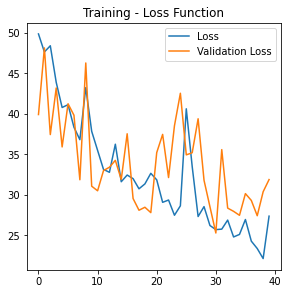

In [34]:
# Begutachtung des Trainingsverlaufs
train_loss_acc_plot(history,skip=10)

In [120]:
# Eventuelle weiteres Training
history = model.fit(
    X_train,
    y_train,
    batch_size=200,
    epochs= 10,
    verbose=1,
    validation_split=.3
)

Epoch 1/10
7/7 [==============================] - 11s 2s/step - loss: 24.3442 - val_loss: 11.9883
Epoch 2/10
7/7 [==============================] - 11s 2s/step - loss: 18.4181 - val_loss: 12.1141
Epoch 3/10
7/7 [==============================] - 12s 2s/step - loss: 18.0210 - val_loss: 10.4341
Epoch 4/10
7/7 [==============================] - 11s 2s/step - loss: 16.7420 - val_loss: 10.0224
Epoch 5/10
7/7 [==============================] - 11s 2s/step - loss: 14.7980 - val_loss: 9.7357
Epoch 6/10
7/7 [==============================] - 11s 2s/step - loss: 14.0787 - val_loss: 9.6981
Epoch 7/10
7/7 [==============================] - 11s 2s/step - loss: 15.8170 - val_loss: 9.5186
Epoch 8/10
7/7 [==============================] - 11s 2s/step - loss: 13.3938 - val_loss: 10.4715
Epoch 9/10
7/7 [==============================] - 12s 2s/step - loss: 14.8550 - val_loss: 9.6374
Epoch 10/10
7/7 [==============================] - 11s 2s/step - loss: 13.9751 - val_loss: 10.0189


In [35]:
# Trainings- und Testfehler
mse_train = model.evaluate(X_train,y_train)
mse_validate = model.evaluate(X_validate,y_validate)

print('MSE train/val: {:.4f} / {:.4f}'.format(mse_train,mse_validate))
print('RMSE train/val: {:.4f} / {:.4f}'.format(np.sqrt(mse_train),np.sqrt(mse_validate)))

15/15 [==============================] - 1s 78ms/step - loss: 31.8642
MSE train/val: 23.5586 / 31.8642
RMSE train/val: 4.8537 / 5.6448


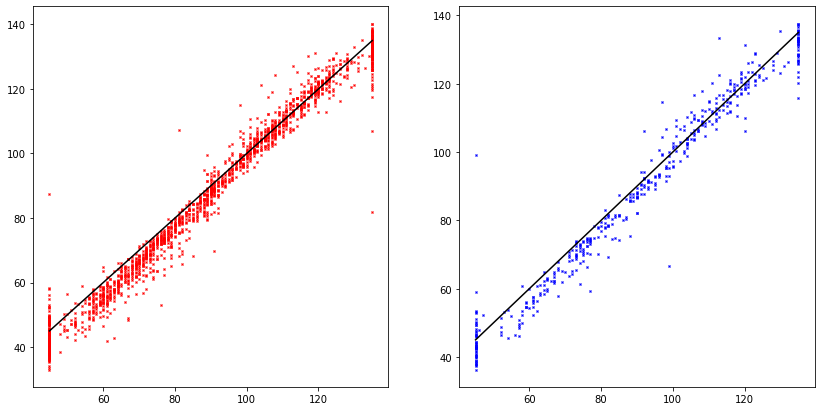

In [36]:
# Visualisierung der Fehler
y_train_p = model.predict(X_train)
y_validate_p = model.predict(X_validate)
plt.figure(figsize=(14,7))
plt.subplot(121)
plt.plot(y_train,y_train_p,'rx',ms=2)
plt.plot([45,135],[45,135],'k-')
plt.subplot(122)
plt.plot(y_validate,y_validate_p,'bx',ms=2)
plt.plot([45,135],[45,135],'k-')

In [45]:
# Speichern des trainierten Modells
#path_to_model_file = './MODELV4.h5'# Speichert im H5-Format
path_to_model_file = './MODELV5' # Speichert im SavedModel-Format
model.save(path_to_model_file)

# um das so gespeicherte Modell auf dem Raspi als TFlite Modell laufen zu lassen, 
# sh. weiter unten...

INFO:tensorflow:Assets written to: ./MODELV5\assets


INFO:tensorflow:Assets written to: ./MODELV5\assets


## Verwendung eines trainierten Modells

In [44]:
# Laden eines Modells
path_to_model_file = './MODELV5'
model_loaded = tf.keras.models.load_model(path_to_model_file)

In [ ]:
# Informationen über das Netz erhalten
#model_loaded.get_config()

In [63]:
# Shape des Input-Layers
model_loaded.layers[0].input_shape

(None, 135, 320, 3)

In [64]:
mse_train = model_loaded.evaluate(X_train,y_train)
mse_validate = model_loaded.evaluate(X_validate,y_validate)

print('MSE train/val: {:.4f} / {:.4f}'.format(mse_train,mse_validate))
print('RMSE train/val: {:.4f} / {:.4f}'.format(np.sqrt(mse_train),np.sqrt(mse_validate)))

15/15 [==============================] - 2s 121ms/step - loss: 96.4938
MSE train/val: 59.1831 / 96.4938
RMSE train/val: 7.6931 / 9.8231


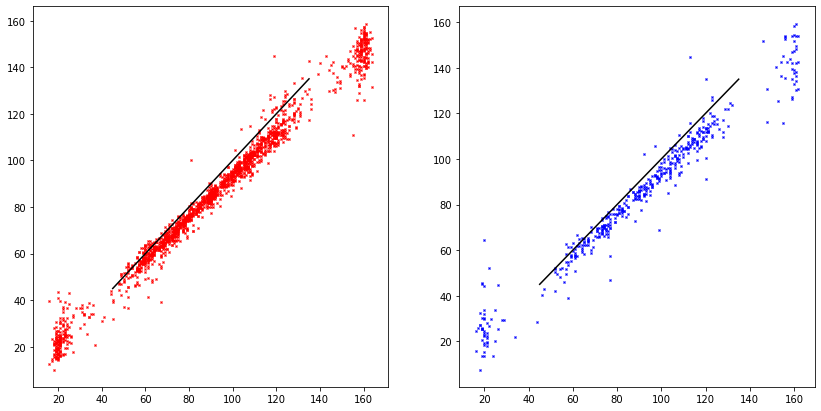

In [65]:
# Visualisierung der Fehler
y_train_p = model_loaded.predict(X_train)
y_validate_p = model_loaded.predict(X_validate)
plt.figure(figsize=(14,7))
plt.subplot(121)
plt.plot(y_train,y_train_p,'rx',ms=2)
plt.plot([45,135],[45,135],'k-')
plt.subplot(122)
plt.plot(y_validate,y_validate_p,'bx',ms=2)
plt.plot([45,135],[45,135],'k-')

### Anwendung des Netzes zur Bestimmung des Lenkwinkels

In [131]:
# Wahl eines Beispielbildes!
xe = np.array( [X_train[0]] )
xe.shape

(1, 100, 320, 1)

In [132]:
# Mittels der Methode predict
model_loaded.predict(xe)

array([[97.38475]], dtype=float32)

In [133]:
# Mittels der Methode __call__ 
model_loaded(xe).numpy()

array([[97.38475]], dtype=float32)

In [134]:
model_loaded.__call__(xe)

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[97.38475]], dtype=float32)>

### Ausführungsgeschwindigkeit

In [135]:
# langsam
%timeit model_loaded.predict(xe)

47.8 ms ± 2.23 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [136]:
# schneller
%timeit model_loaded(xe).numpy()

7.79 ms ± 82.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Model als Tensorflow-lite-Modell speichern

Zur späteren Nutzung auf dem Raspi

In [46]:
# Pfad zum gespeicherten Modell angeben

# -> erzeugt Ordner mit Daten des Modells
#path_to_model_tf_format = './gitignore/data/model/DEMO_MODELL_saved_on_RPI'
path_to_model_tf_format = './MODELV5'
#model.save(path_to_model_tf_format)
#model_loaded.save(path_to_model_tf_format)

In [47]:
# Modell muss ins tflite-format konvertiert werden
# hier: gespeichertes Modell erst mal laden...

#path_to_model_tf_format = './gitignore/data/model/DEMO_MODELL'
converter = tf.lite.TFLiteConverter.from_saved_model(path_to_model_tf_format)
#converter = tf.lite.TFLiteConverter.from_keras_model(model_loaded)

In [48]:
# ... dann in tflite konvertieren

tflite_model = converter.convert()
# This step fails on my RPI, but works in WinPython. Rob.

In [49]:
# und nun noch als .tflite File abspeichern

path_to_model_tf_format = './MODELV5.tflite'
with open(path_to_model_tf_format, 'wb') as f:
    f.write(tflite_model)

# dieses File kann nun auf dem Raspi übertragen werden
# dort geht es dann weiter ...

### Alternative Verwendung des Modells mit Tensorflow-Lite
#### geeingeter Ablauf für Raspi

Das trainierte Modell muss dazu entsprechend convertiert und gespeichert werden. (siehe oben)

Der Tensoflow Runtime interpreter muss installiert werden.

`pip install tflite-runtime`

In [45]:
import tflite_runtime.interpreter as tfi

In [46]:
# Laden des Modells
interpreter = tfi.Interpreter(model_path="./MODELV5.tflite")

In [47]:
# Einige Info zum Input-Layer
# -> Der Input-Layer hat den Index 0!
# -> Die erwartet Shape ist (1,135,320,3) -> Also genauso wie das resized bild vom Auto
# -> Der erwartete Datentype ist numpy.float32!
interpreter.get_input_details()

[{'name': 'serving_default_conv2d_input:0',
  'index': 0,
  'shape': array([  1, 135, 320,   3]),
  'shape_signature': array([ -1, 135, 320,   3]),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [48]:
# Einige Infos zum Output-Layer - Der Output-Layer hat den Index 33!
interpreter.get_output_details()

[{'name': 'StatefulPartitionedCall:0',
  'index': 33,
  'shape': array([1, 1]),
  'shape_signature': array([-1,  1]),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [54]:
# Einlesen der Beispielbilder ( 5 Dateien im Ordner ./data/images/)

from os import listdir
from os.path import isfile, join
from PIL import Image

picpath = "./data/images/"
imgsfiles = [picpath+f for f in listdir(picpath) if isfile(join(picpath, f))]
imgsfiles



from camcar_new import *
#plt.imshow(imgs[0])

car = CamCar()

# Einlesen aller Bilder mit PIL und gleich Anpassen mit resize_image()
imgs = [car.resize_image(np.array(Image.open(img)),100,370,0,640) for img in imgsfiles]
imgs = np.array(imgs)
imgs.shape

 # Einlesen aller Bilder unter Nutzung meiner Funktion resize_image damit die
 # zur Abfrage des NNs genutzen Bilder die gleiche Shape und Größe haben wie 
 # die zum Training verwendeten, bzw. so wie das NN es erwartet

# wenn Live-Bild von Cam:
# 1.) Bild mittels Funktion resize_image(img, 100,370,0,640) anpassen
# 2.) für Keras-Model formatieren -> sh. Reshapen



(5, 135, 320, 3)

In [55]:
### Die Beispielbilder müssen in das vom Keras-Modell erwartet Format gebracht werden.

# Shape (Anzahl der Bilder, Höhe, Breite, Farbkanäle)

# Reshapen
n,h,w,_ = imgs.shape
imgs = imgs.reshape((n,h,w,3)) # 3 für Farbbild, 1 für Grau, dafür dann nur n, h, w mehrn icht
imgs.shape

(5, 135, 320, 3)

In [56]:
# Datentyp muss gem. Anforderungen Input-Layer auf float32 geändert werden
imgs_f32 = imgs.astype(np.float32)

In [57]:
# Einmalige Ausführung stellt Resourcen bereits
interpreter.allocate_tensors()

In [58]:
# Setzen der Werte für den Input-Layer
interpreter.set_tensor(0,imgs_f32[:1,:,:,:])
#Layer wird durch den Index identigiziert, 0 muss dort stehen und in der richtigen shape übergeben werden

In [59]:
# Prozessieren des Netzes
interpreter.invoke()

In [60]:
# Abfrage des Output-Layers
interpreter.get_tensor(33)

array([[86.79442]], dtype=float32)

In [ ]:
# zusammenführen der Schritte in einer Funktion

# Allcate sh. oben erste ausführen!

# für input-layer erforderliche shape festelegen, hier einzelbild
single_img_f32 = imgs_f32[:1,:,:,:]

# abfrage durchfürhen
def mypredict(img):
    interpreter.set_tensor(0,img)
    interpreter.invoke()
    return interpreter.get_tensor(33)[0][0] # anhand id des outputlayers abfrageb

In [ ]:
mypredict(single_img_f32)

107.9262